## Con UMAP vamos a "reducir" el Dataframe y simplificarlo tratando de perder el mínimo de información. Esta simplificación nos va a permitir graficarlo en 2D y ver las posibles relaciones para la clusterización

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import csv
import pandas.util.testing as tm

import umap
import hdbscan

%matplotlib inline

In [31]:
df= pd.read_csv('../data2/processed/18.04.2020_Dataframe_for_clustering', index_col = 0)

In [32]:
df.head(1)

,id,vat,category,value,quantity,Label Printer_value,Label Printer_qty,Accessories_value,Accessories_qty,Printhead_value,...,Touch Screen & Computer_value,Touch Screen & Computer_qty,RFID_value,RFID_qty,Wristband_value,Wristband_qty,CNAE,provincia,provincia_encoded,cnae_encoded
0,125,A28415495,Label Printer,239.0,1.0,239.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3212 - Fabricación de artículos de joyería y ...,Madrid,30,199


Eliminamos las columnas de ID y VAT ya que son únicamente identificativas.
Y de Provincia y CNAE sin codificar

In [33]:
df = df.drop(['id','vat', 'category', 'provincia', 'CNAE','value','quantity','Accessories_value','Accessories_qty'], axis=1)
df

,Label Printer_value,Label Printer_qty,Printhead_value,Printhead_qty,Mobile Computing_value,Mobile Computing_qty,Scanner_value,Scanner_qty,Label_value,Label_qty,...,Tickets_value,Tickets_qty,Touch Screen & Computer_value,Touch Screen & Computer_qty,RFID_value,RFID_qty,Wristband_value,Wristband_qty,provincia_encoded,cnae_encoded
0,239.0,1.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,199
1,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,263
2,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,375
3,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,403
4,0.0,0.0,899.91,3.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8330,0.0,0.0,0.00,0.0,0.0,0.0,85.79,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,376
8331,0.0,0.0,0.00,0.0,0.0,0.0,472.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,307
8332,0.0,0.0,0.00,0.0,0.0,0.0,472.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,336
8333,0.0,0.0,0.00,0.0,0.0,0.0,366.41,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,411


Trabamamos con un Dataframe de 7625 filas y 32 columnas

In [7]:
df['Total'] = df['Label Printer_value']+df['Printhead_value']+df['Mobile Computing_value']+df['Scanner_value']+ df['Label_value']+df['Ribbon_value']+df['Card Printer_value']+df['Card_value']+df['Card Ribbon_value']+df['Ticket Printer_value']+df['Tickets_value']+df['Touch Screen & Computer_value']+df['RFID_value']+ df['Wristband_value']

In [11]:
df = df[df['Total'] != 0]

In [13]:
df.shape

(5023, 31)

# Reducimos el Dataframe original siguiendo los parámetros que van por defecto configurados en UMAP

In [12]:
umap_reducer = umap.UMAP()
embedding_basic = umap_reducer.fit_transform(df)

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../

Obtenemos un nuevo dataframe con solo 2 columnas

In [14]:
embedding_basic.shape

(5023, 2)

Lo ploteamos

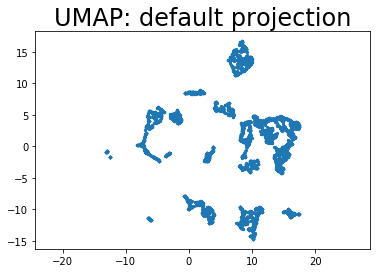

In [15]:
plt.scatter(embedding_basic[:, 0], embedding_basic[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: default projection', fontsize=24);

# Ahora vamos ver como "tunear" los parámetros de UMAP para ver si podemos hacer reducciones 'más clusterizables'

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 23.6 s, sys: 156 ms, total: 23.8 s
Wall time: 23.1 s


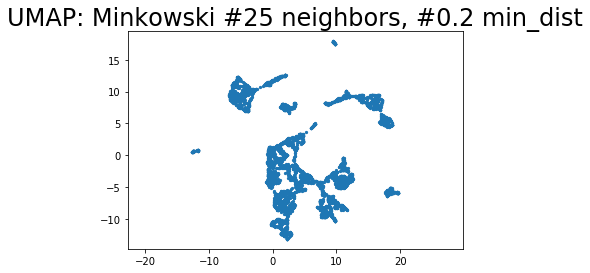

In [16]:
fit_reducer = umap.UMAP(
        n_neighbors=25,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_1 = fit_reducer.fit_transform(df)
plt.scatter(u_1[:, 0], u_1[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #25 neighbors, #0.2 min_dist', fontsize=24);

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 46.7 s, sys: 336 ms, total: 47 s
Wall time: 45.6 s


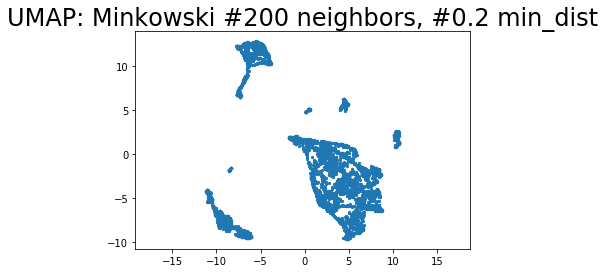

In [17]:
fit = umap.UMAP(
        n_neighbors=200,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_2 = fit.fit_transform(df)
plt.scatter(u_2[:, 0], u_2[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #200 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 20.9 s, sys: 108 ms, total: 21 s
Wall time: 20.4 s


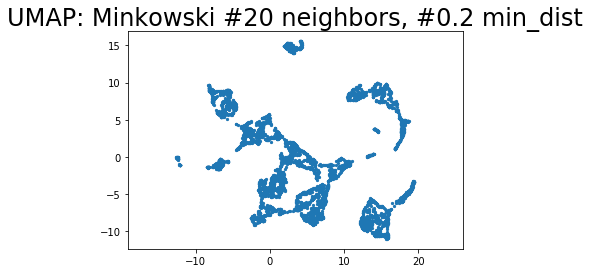

In [18]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.2,
        n_components=2,
        metric='minkowski')
%time u_3 = fit.fit_transform(df)
plt.scatter(u_3[:, 0], u_3[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 23.7 s, sys: 96.2 ms, total: 23.8 s
Wall time: 22.7 s


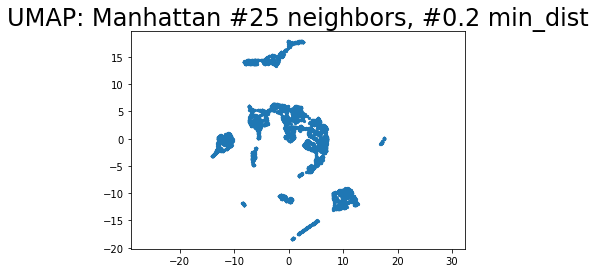

In [19]:
fit = umap.UMAP(
        n_neighbors=25,
        min_dist=0.2,
        n_components=2,
        metric='manhattan')
%time u_4 = fit.fit_transform(df)
plt.scatter(u_4[:, 0], u_4[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #25 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 18.2 s, sys: 180 ms, total: 18.4 s
Wall time: 18.1 s


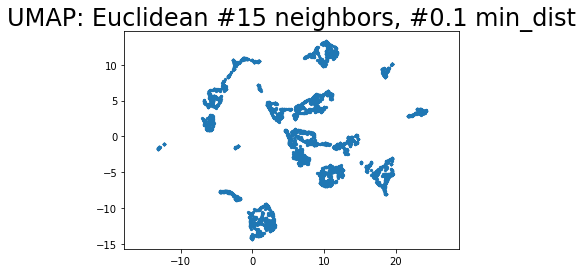

In [20]:
fit = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_5 = fit.fit_transform(df)
plt.scatter(u_5[:, 0], u_5[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #15 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 21 s, sys: 108 ms, total: 21.1 s
Wall time: 20.3 s


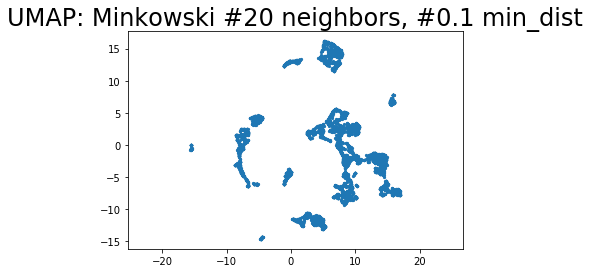

In [21]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='minkowski')
%time u_6 = fit.fit_transform(df)
plt.scatter(u_6[:, 0], u_6[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 20.8 s, sys: 88.1 ms, total: 20.9 s
Wall time: 20.2 s


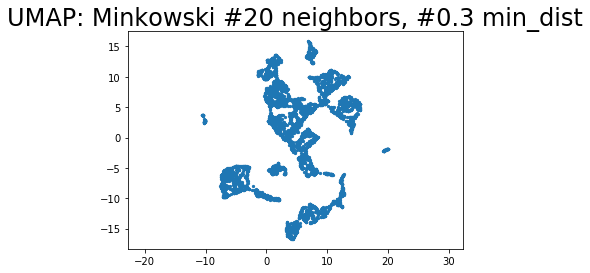

In [22]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.3,
        n_components=2,
        metric='minkowski')
%time u_7 = fit.fit_transform(df)
plt.scatter(u_7[:, 0], u_7[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Minkowski #20 neighbors, #0.3 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 21 s, sys: 68.1 ms, total: 21.1 s
Wall time: 20.4 s


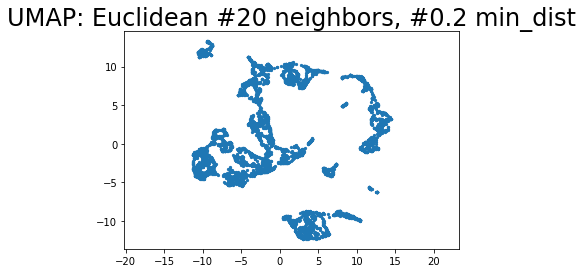

In [23]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.2,
        n_components=2,
        metric='euclidean')
%time u_8 = fit.fit_transform(df)
plt.scatter(u_8[:, 0], u_8[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.2 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not 

CPU times: user 11.8 s, sys: 83.9 ms, total: 11.9 s
Wall time: 11.1 s


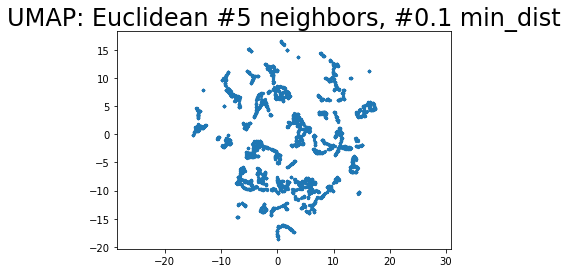

In [24]:
fit = umap.UMAP(
        n_neighbors=5,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_9 = fit.fit_transform(df)
plt.scatter(u_9[:, 0], u_9[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #5 neighbors, #0.1 min_dist', fontsize=24);   

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 20.9 s, sys: 88.1 ms, total: 20.9 s
Wall time: 20.1 s


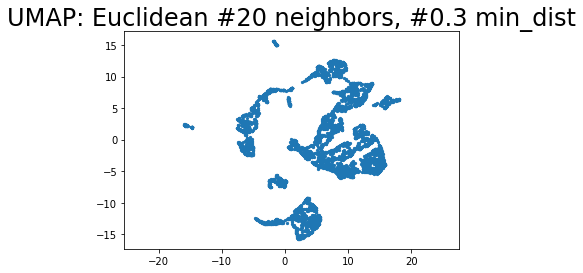

In [25]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.3,
        n_components=2,
        metric='euclidean')
%time u_10 = fit.fit_transform(df)
plt.scatter(u_10[:, 0], u_10[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.3 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 21 s, sys: 72 ms, total: 21.1 s
Wall time: 20.3 s


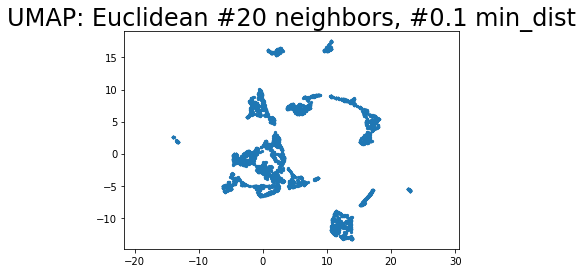

In [26]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='euclidean')
%time u_11 = fit.fit_transform(df)
plt.scatter(u_11[:, 0], u_11[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Euclidean #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 21.3 s, sys: 60 ms, total: 21.3 s
Wall time: 20.3 s


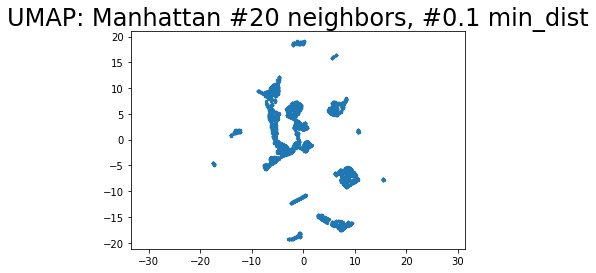

In [27]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=42)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 22.3 s, sys: 80 ms, total: 22.4 s
Wall time: 21.3 s


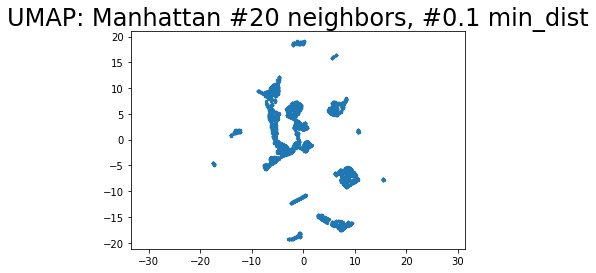

In [28]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=42)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 22 s, sys: 136 ms, total: 22.1 s
Wall time: 21.1 s


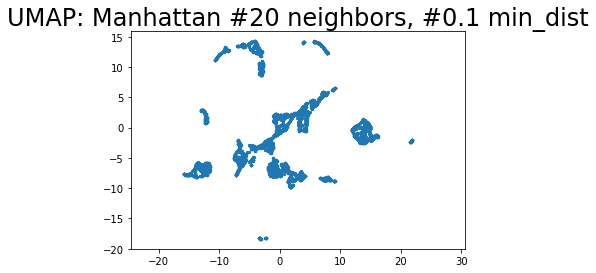

In [29]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state=99)
%time u_12 = fit.fit_transform(df)
plt.scatter(u_12[:, 0], u_12[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  